금융 공학 및 위험 관리 특화과정 Financial engineering & Risk management<br>
강좌 5 Computational Methods in Pricing and Model Calibration<br>
3주차 Model Calibration<br>
Lectures<br>
#28 3.2 Calibration and Implied Volatility<br><br>

# Question 1. Is there a model that can explain the (entire) surface?
A. In general, finding a model to fit the surface perfectly is impossible. However, one can find a model that can do a decent fit. This is the essence of calibration.

# Question 2. How about if you want to find a price at a maturity beyond the longest available one?
A. By extrapolation - model-based or curve-based

# Q. If shorter maturities move, how does it impact  longer ones and vice-versa?
A. not easy!

- Definition<br>
The process of adjusting the parameters of a model such that model prices are compatible with market prices is called *<span style="color:yellow">calibration</span>*.<br>
i.e. (Roughly speaking) given the market prices $V_i$ and model prices $\widetilde{V}_i^{\theta}$, by tweaking $\theta$ in a way that $V_i$ and $\widetilde{V}_i^{\theta}$ gets close enough.

# The simplest example w/ one price & one parameter_implied volatility.
- Finding a volatility such that for the same strike and maturity, model price matches the market price
- One price vs. one parameter (implied volatility, denoted as $\sigma_{\text{imp}}$)
- Market convention: Black-Merton-Scholes model(GBM)<br>
Here, we have an one-parameter model: $\Theta = \{ \sigma \}$.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import readPlotOptionSurface    # vol surface를 그릴 때 쓰인다
import modulesForCalibration as mfc

import matplotlib.pyplot as plt

Parameters

In [1]:
# Parameters
alpha = 1.5
eta = 0.2
    
n = 12

# Model
model = 'GBM'

# risk free rate
r = 0.0245
# dividend rate
q = 0.005
# spot price
S0 = 190.3


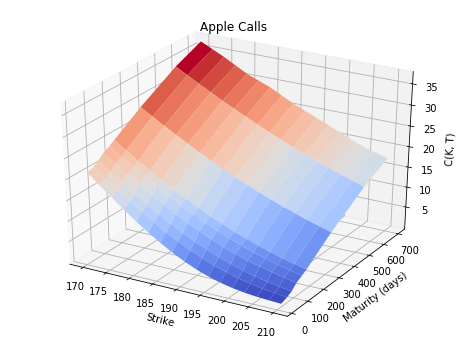

In [9]:
# Using rPOS module to read option prices data and to visualize, need to assign (three) variables
maturities, strikes, callPrices = readPlotOptionSurface.readNPlot()

In [10]:
marketPrices = callPrices
maturities_years = maturities/365.0

# select strike and maturity & corresponding option price
T_days = maturities[4]
T = maturities_years[4]
K = strikes[6]
c = callPrices[4][6]

print("For maturity T=%d(days) and strike K=%d, call price is %2.3f" %(T_days, K, c))


For maturity T=151(days) and strike K=185, call price is 13.750


In [14]:
sigArray = []
cArray = []


# implied volatility via grid search
# just for illustrative purposes
# there are much more efficient ways of doing it
eMin = 1.0e6
for sig in mfc.myRange(0.01, 0.40, 0.005):
    
    params = []
    params.append(sig)
    
    km, cT_km = mfc.genericFFT(params, S0, K, r, q, T, alpha, eta, n, model)
    cHat = cT_km[0] # cHat means model price
    
    sigArray.append(sig)
    cArray.append(cHat)
    
    e = abs(cHat-c) # want to minimize this error so that e is very close to 0
    if (e < eMin):
        eMin = e
        impliedVol = sig
        # print(eMin)
        # print(impliedVol)
        # print(' ')
    
print('Implied vol = ' + str(impliedVol))   # result is about 21%

Implied vol = 0.2100000000000001


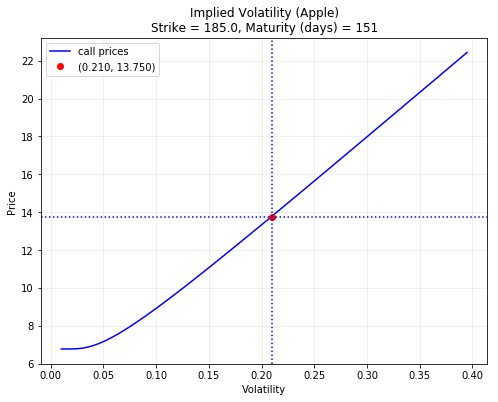

In [15]:
# plot
fig = plt.figure(figsize=(8,6))
plt.plot(sigArray, cArray, 'b')
plt.plot(impliedVol, c, 'ro')
plt.axhline(y=c, color='b', linestyle=':')
plt.axvline(x=impliedVol, color='b', linestyle=':')
plt.grid(alpha=0.25)
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.title('Implied Volatility (Apple)\nStrike = %1.1f, Maturity (days) = %i' % (K, T_days))
leg = ['call prices', '(%1.3f, %1.3f)' % (impliedVol, c)]
plt.legend(leg)
#plt.savefig('impliedVolCall.png')
plt.show()